# **Forcasting XAUUSD dengan Model ARIMA**

NIM : 22.11.5113

Nama : Taufiq Hidayatullah

Kelas : BDDM 4



---



Sumber Dataset : `Kaggle`

Link Dataset : https://www.kaggle.com/datasets/alireza151/gold-xauusd-prediction-and-forcast-using-arima



---



# **1. Data Preprocessing**

# 1.1 Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/content/CleanedData.xlsx"

df = pd.read_excel(path)
df = df.set_index('Date')
df

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-04,1787.22,1787.73,1785.00,1786.39,-83,-0.05
2021-07-05,1786.68,1794.00,1783.80,1791.15,447,0.25
2021-07-06,1790.85,1814.89,1789.89,1795.68,483,0.27
2021-07-07,1795.28,1809.50,1793.41,1803.22,794,0.44
2021-07-08,1803.29,1818.00,1793.90,1803.75,46,0.03
...,...,...,...,...,...,...
2023-06-29,1909.47,1913.00,1893.16,1908.76,-71,-0.04
2023-06-30,1908.71,1922.61,1900.57,1919.20,1049,0.55
2023-07-02,1920.30,1920.30,1917.50,1917.70,-260,-0.14


# 1.2 Nilai Null

In [3]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Change(Pips),0
Change(%),0


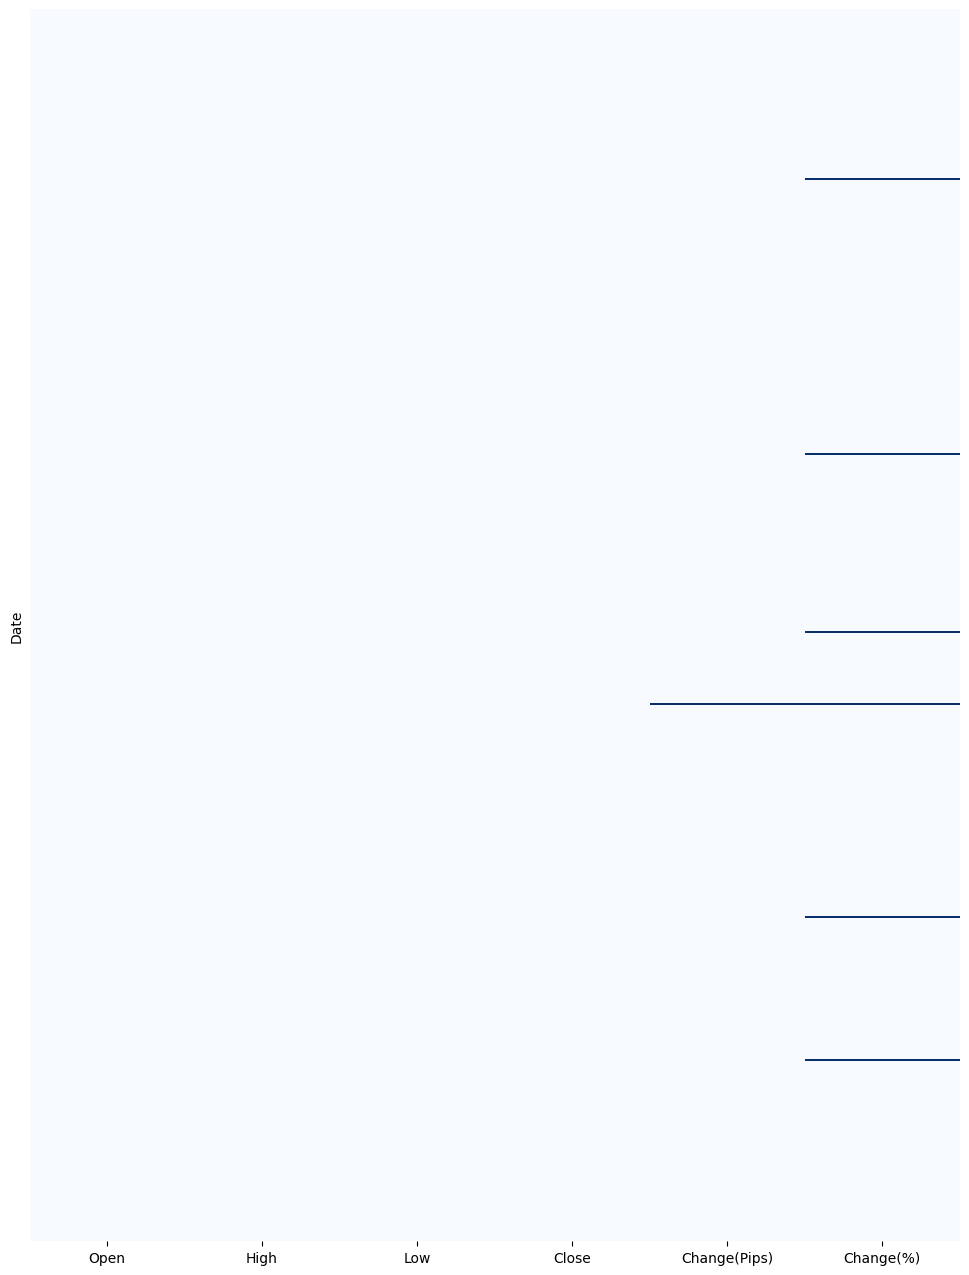

In [4]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 16))
sns.heatmap(df==0, cbar=False, cmap='Blues', yticklabels=False, ax=ax)
plt.show()

In [5]:
df.apply(lambda x: (x == 0).sum())

,0
Open,0
High,0
Low,0
Close,0
Change(Pips),1
Change(%),6


# 1.3 Membiasakan diri dengan atribut/variabel dari dataset

In [6]:
df.describe().round(3)

,Open,High,Low,Close,Change(Pips),Change(%)
count,622.000,622.000,622.000,622.000,622.000,622.000
mean,1833.470,1844.209,1822.538,1833.593,12.240,0.004
std,94.418,95.163,93.223,94.346,1480.618,0.805
min,1627.270,1640.760,1615.040,1626.890,-5559.000,-3.050
25%,1775.080,1787.085,1765.435,1774.958,-704.000,-0.380
50%,1815.230,1826.375,1808.335,1815.470,11.500,0.005
75%,1913.792,1924.718,1896.670,1914.700,749.500,0.410
max,2052.780,2071.320,2030.770,2051.930,6612.000,3.330


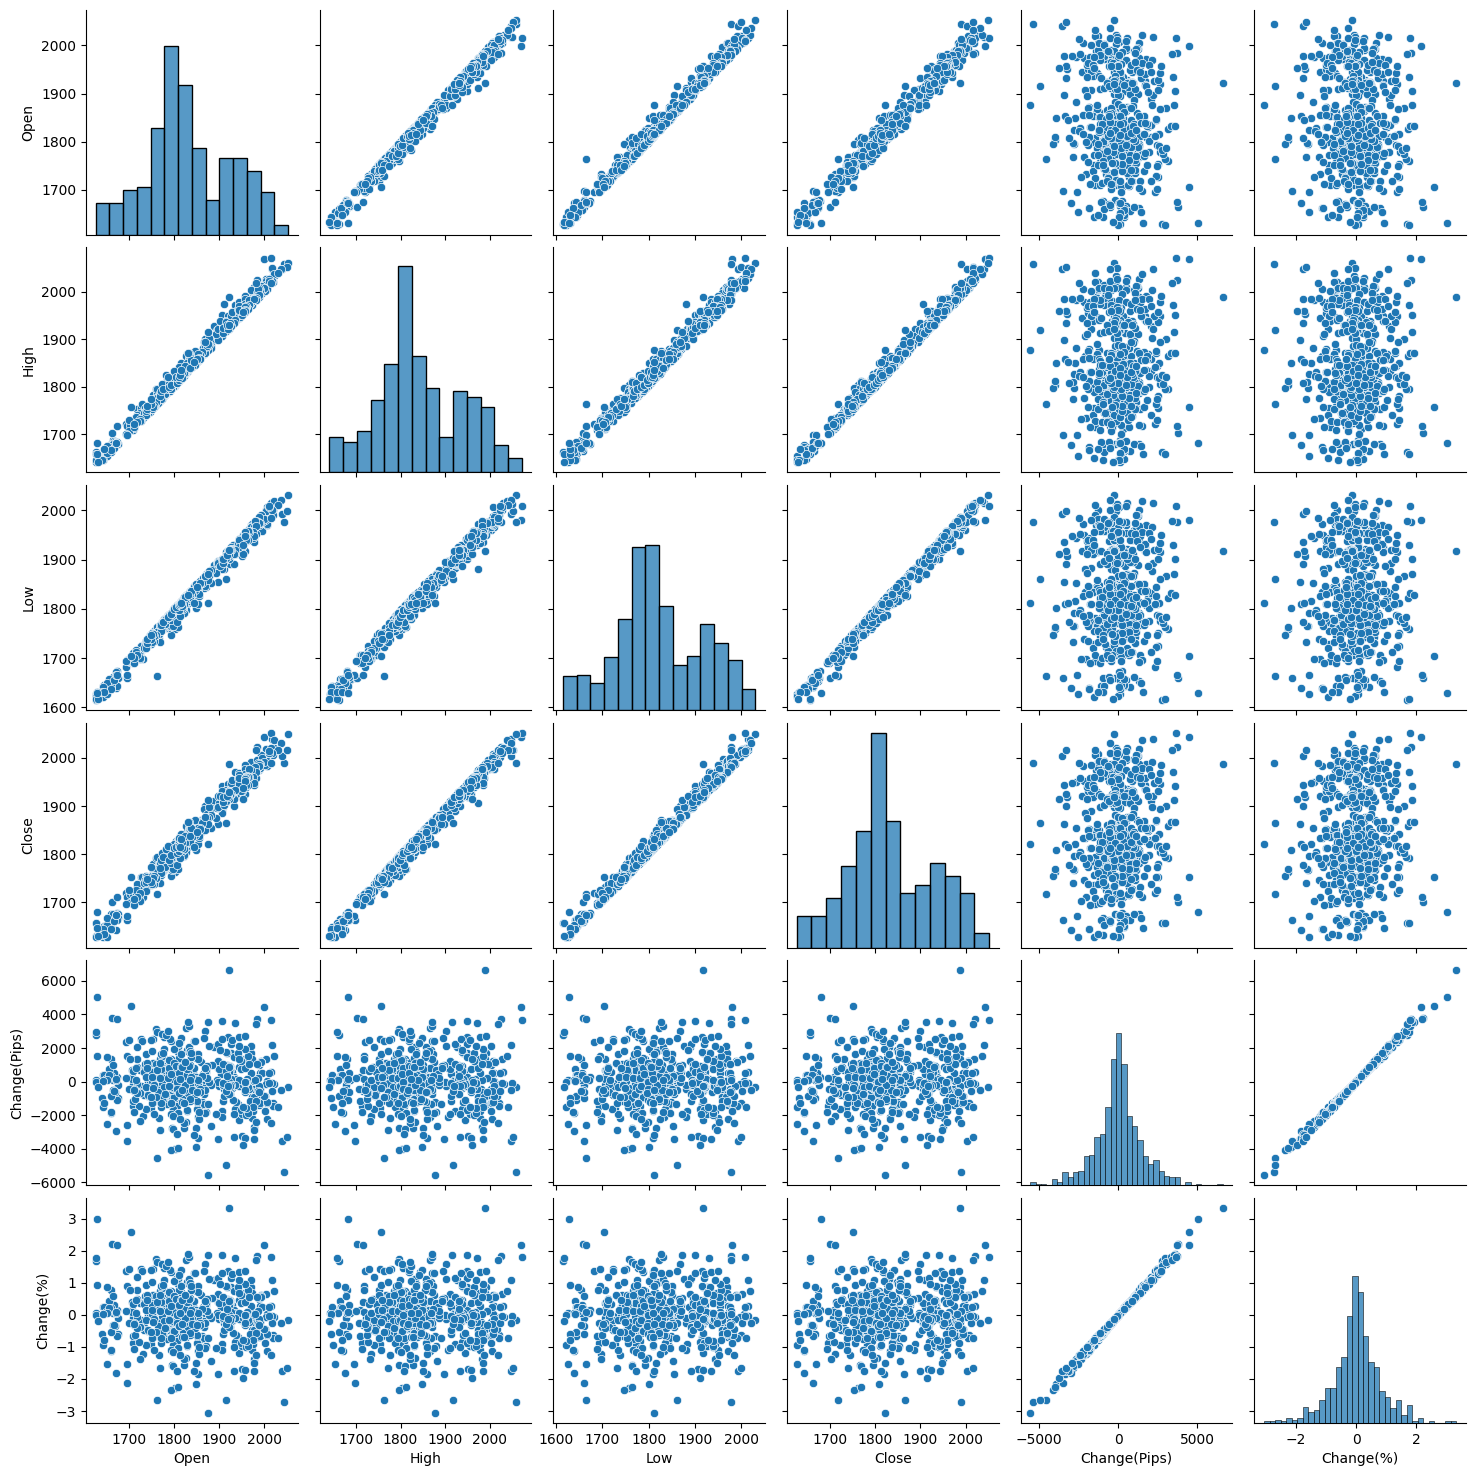

In [7]:
import seaborn as sns

sns.pairplot(data=df)
plt.show()

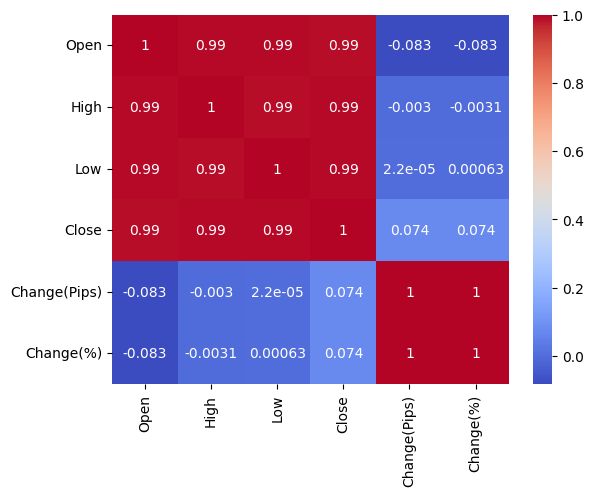

In [8]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

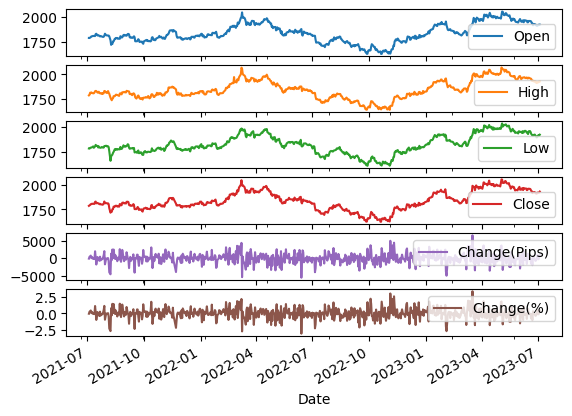

In [9]:
#time series plot
df.plot(subplots=True)

In [10]:
df_weekly = df.resample('W').mean()
df_weekly

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-04,1787.220000,1787.730000,1785.000000,1786.390000,-83.000000,-0.050000
2021-07-11,1798.005000,1809.525000,1793.838333,1801.321667,331.666667,0.185000
2021-07-18,1814.511667,1822.751667,1805.850000,1815.956667,144.500000,0.075000
2021-07-25,1807.855000,1812.781667,1796.275000,1805.295000,-256.000000,-0.141667
2021-08-01,1808.361667,1817.550000,1802.123333,1810.498333,213.666667,0.116667
...,...,...,...,...,...,...
2023-06-11,1957.770000,1967.458333,1948.130000,1959.080000,131.000000,0.065000
2023-06-18,1954.123333,1964.213333,1944.143333,1953.616667,-50.666667,-0.026667
2023-06-25,1936.828333,1941.996667,1923.350000,1930.611667,-621.666667,-0.321667


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

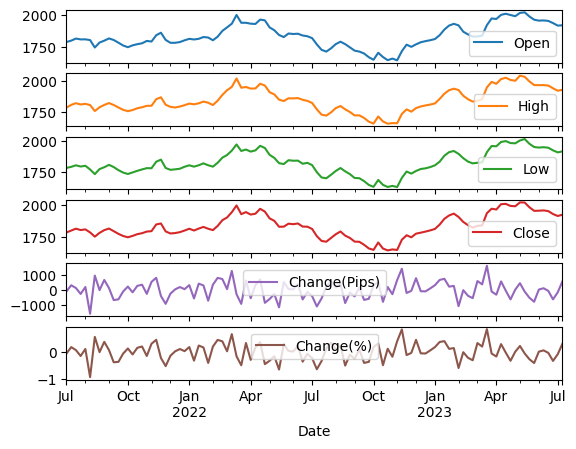

In [11]:
df_weekly.plot(subplots=True)

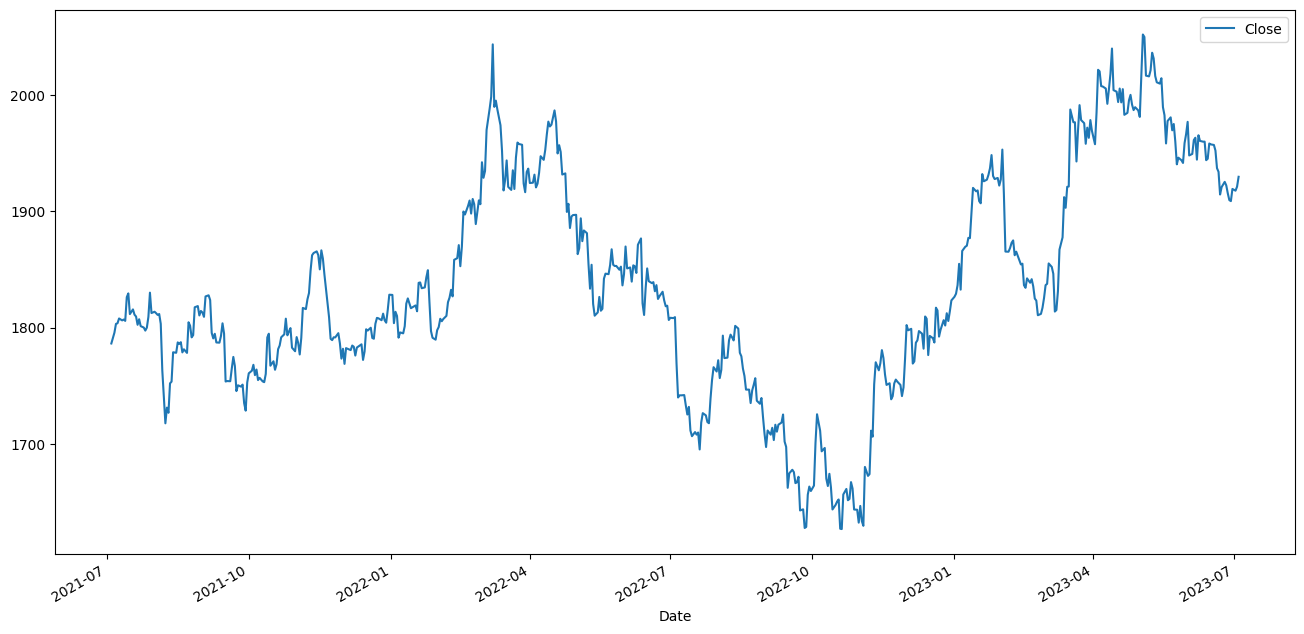

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))
df.plot(y='Close', kind='line',ax=ax)
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series,name):

    result = adfuller(series.values)
    print(f'\n    Augmented Dickey-Fuller Test on {name}', "\n   ", '-'*40)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32m    Stationary\u001b[0m")
    else:
        print("\x1b[31m    Non-stationary\x1b[0m")
    print('    ','-'*40)

In [14]:
for column in df.columns:
    check_stationarity(df[column],name=column)


    Augmented Dickey-Fuller Test on Open 
    ----------------------------------------
ADF Statistic: -1.875612
p-value: 0.343619
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Non-stationary
     ----------------------------------------

    Augmented Dickey-Fuller Test on High 
    ----------------------------------------
ADF Statistic: -1.755431
p-value: 0.402802
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Non-stationary
     ----------------------------------------

    Augmented Dickey-Fuller Test on Low 
    ----------------------------------------
ADF Statistic: -2.008755
p-value: 0.282747
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Non-stationary
     ----------------------------------------

    Augmented Dickey-Fuller Test on Close 
    ----------------------------------------
ADF Statistic: -1.851243
p-value: 0.355334
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Non-stationary
     ----------------------------------------


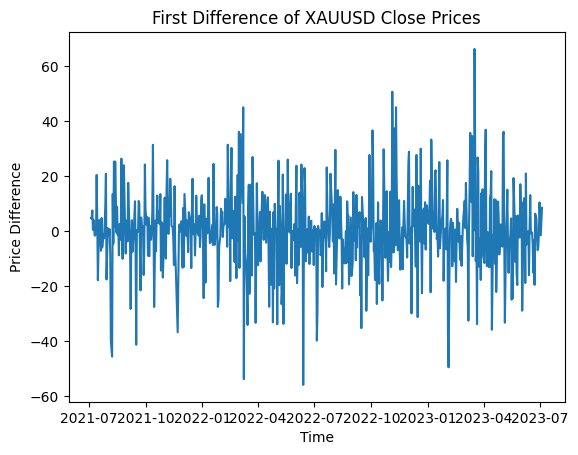

In [15]:
diff = df['Close'].diff().dropna()
plt.plot(diff)
plt.title('First Difference of XAUUSD Close Prices')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.show()

In [16]:
check_stationarity(diff,name='D=1 Close')


    Augmented Dickey-Fuller Test on D=1 Close 
    ----------------------------------------
ADF Statistic: -19.116334
p-value: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
    Stationary
     ----------------------------------------


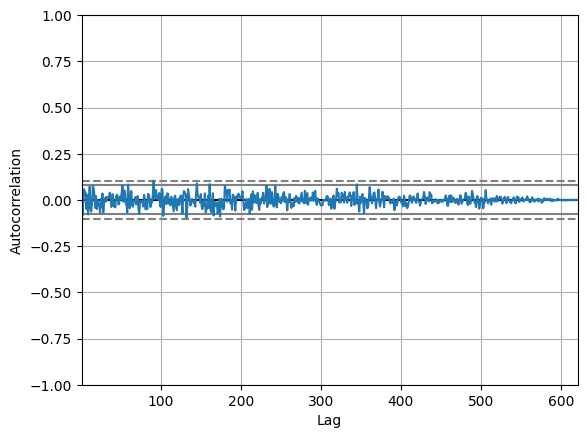

In [17]:
pd.plotting.autocorrelation_plot(diff)
plt.show()

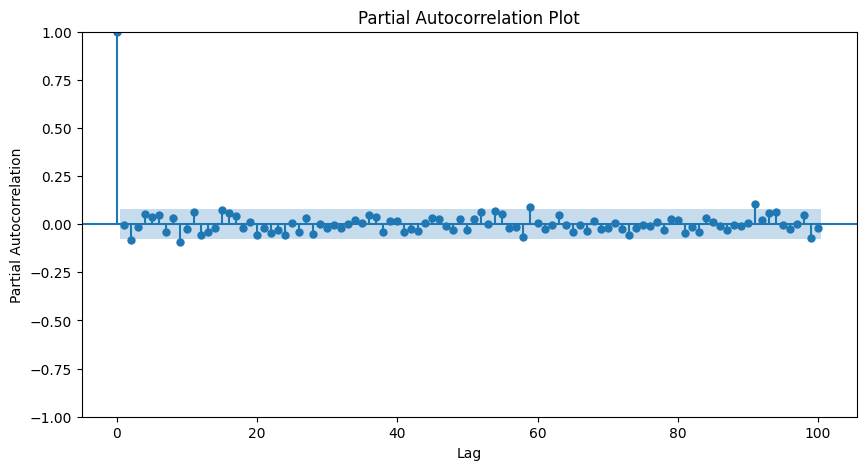

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(diff, ax=ax, lags=100)
ax.set(title='Partial Autocorrelation Plot', xlabel='Lag', ylabel='Partial Autocorrelation')
plt.show()



---



# **2. Menyesuaikan Model**

# 2.1 Deskripsi ARIMA

`ARIMA`, singkatan dari `Autoregressive Integrated Moving Average`, adalah model statistik yang banyak digunakan untuk menganalisis dan meramalkan data deret waktu. Model ini terdiri dari tiga komponen utama :

* `AR (Autoregressive)`: Komponen ini menggunakan nilai-nilai masa lalu dari deret waktu itu sendiri untuk memprediksi nilai saat ini. Ini direpresentasikan oleh parameter p, yang menunjukkan jumlah lag (penundaan) yang digunakan dalam model.

* `I (Integrated)`: Komponen ini menunjukkan tingkat diferensiasi (pengurangan nilai berurutan) yang diterapkan pada deret waktu untuk membuatnya stasioner. Stasioneritas adalah sifat penting dalam analisis deret waktu, yang menyiratkan bahwa rata-rata, varians, dan autokorelasi data konstan dari waktu ke waktu. Ini direpresentasikan oleh parameter d.

* `MA (Moving Average)`: Komponen ini menggunakan nilai-nilai masa lalu dari galat peramalan untuk memprediksi nilai saat ini. Ini direpresentasikan oleh parameter q, yang menunjukkan jumlah lag dari galat peramalan yang digunakan dalam model.

Dengan menggabungkan ketiga komponen ini, model ARIMA dapat menangkap pola kompleks dalam data deret waktu dan menghasilkan peramalan yang akurat. Model ini biasanya dilambangkan dengan ARIMA(p, d, q), di mana p, d, dan q adalah parameter yang ditentukan sebelumnya.

# 2.2 Split Data

In [19]:
train_size = 0.8  # 80% dari data akan digunakan untuk training model
split_index = int(len(df) * train_size)
train_data = df['Close'][:split_index]
test_data = df['Close'][split_index:]

print('Number of observations in training set:', len(train_data))
print('Number of observations in testing set:', len(test_data))

Number of observations in training set: 497
Number of observations in testing set: 125


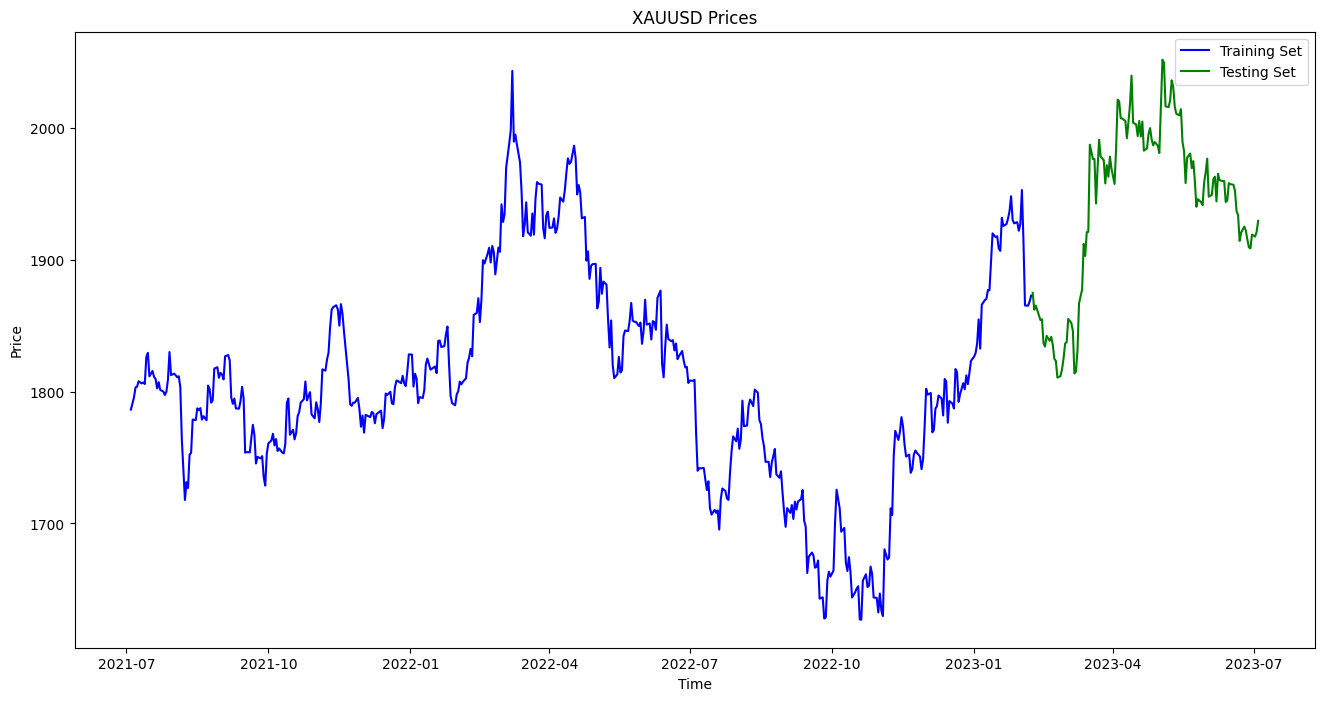

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(train_data, color='blue', label='Training Set')
plt.plot(test_data, color='green', label='Testing Set')
plt.title('XAUUSD Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show(ax)

# 2.3 Memprediksi Hyperparameter Terbaik

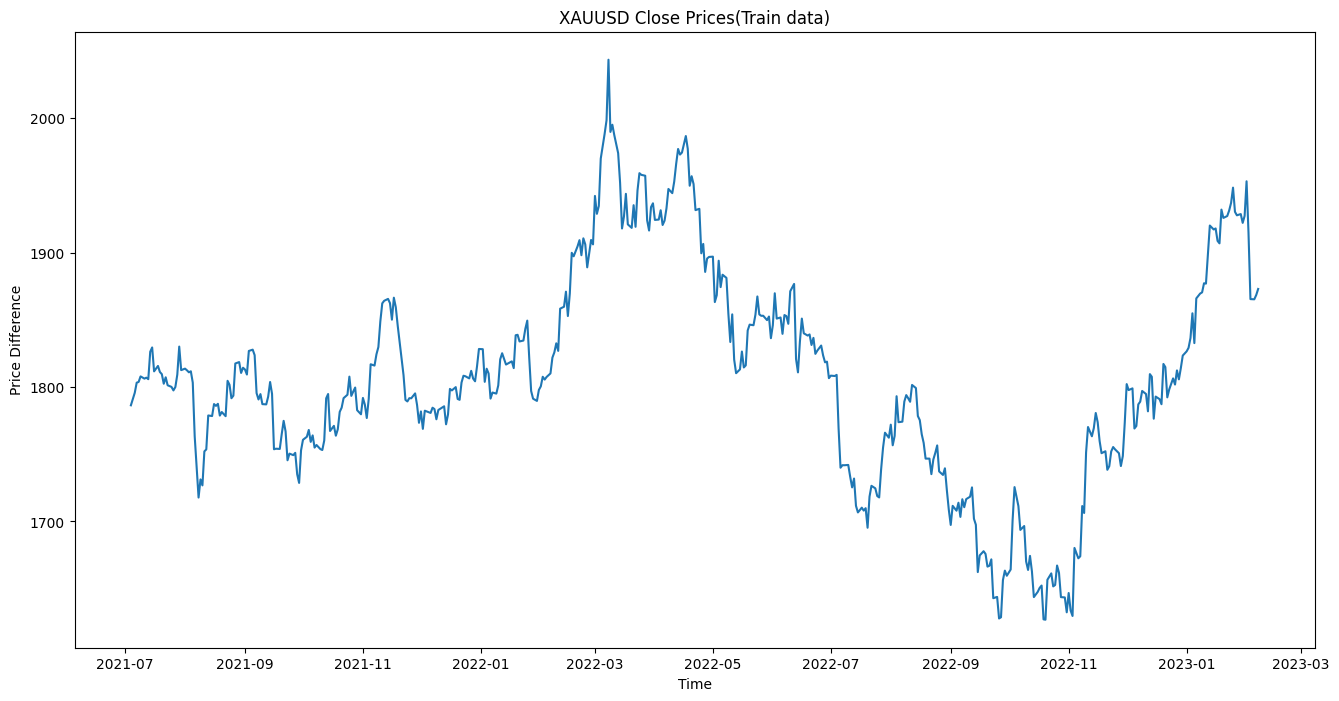

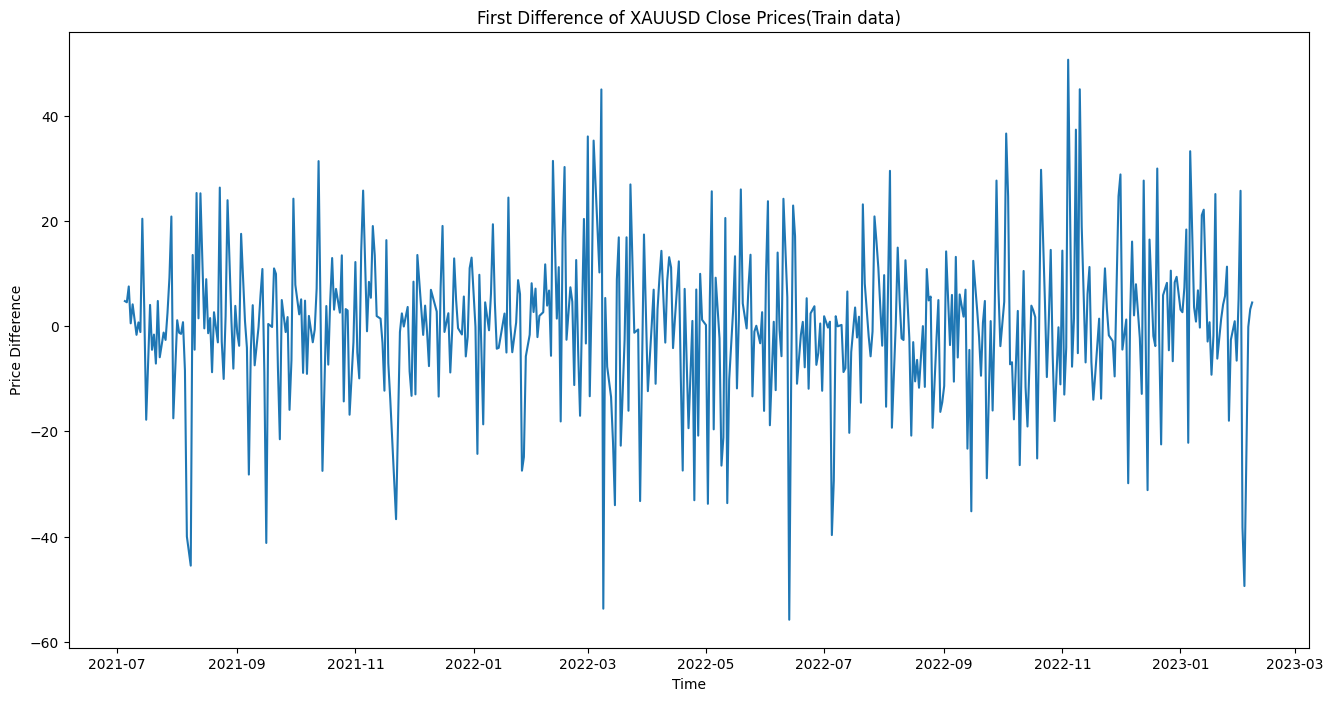

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(train_data)
plt.title('XAUUSD Close Prices(Train data)')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.show(ax)

fig, ax = plt.subplots(figsize=(16, 8))
diff_train =train_data.diff().dropna()
plt.plot(diff_train)
plt.title('First Difference of XAUUSD Close Prices(Train data)')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.show(ax)

In [22]:
check_stationarity(train_data,name='Close(train)')
check_stationarity(diff_train,name='D=1 Close(train)')


    Augmented Dickey-Fuller Test on Close(train) 
    ----------------------------------------
ADF Statistic: -1.908185
p-value: 0.328221
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
    Non-stationary
     ----------------------------------------

    Augmented Dickey-Fuller Test on D=1 Close(train) 
    ----------------------------------------
ADF Statistic: -12.721794
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
    Stationary
     ----------------------------------------


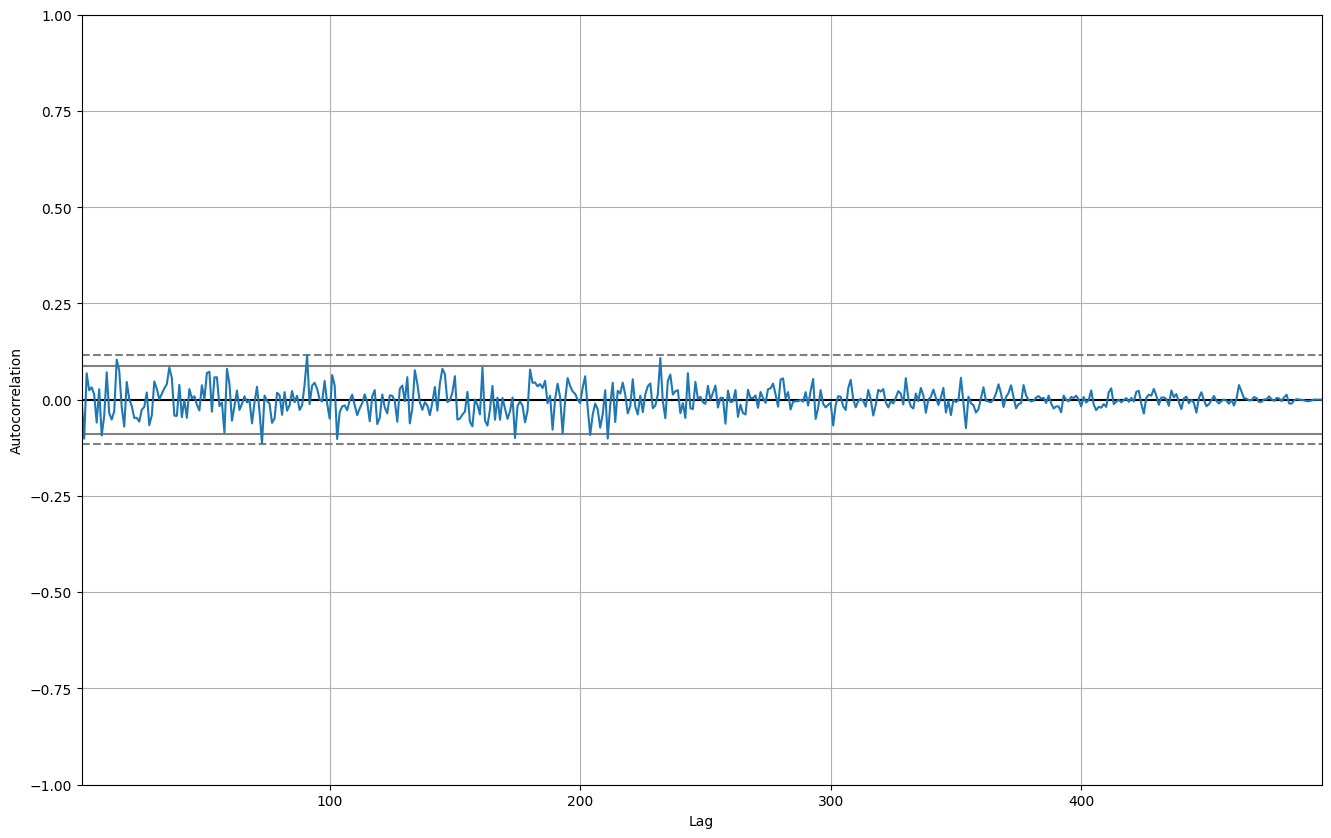

In [23]:
fig, ax = plt.subplots(figsize=(16, 10))
pd.plotting.autocorrelation_plot(diff_train)
plt.show(ax)

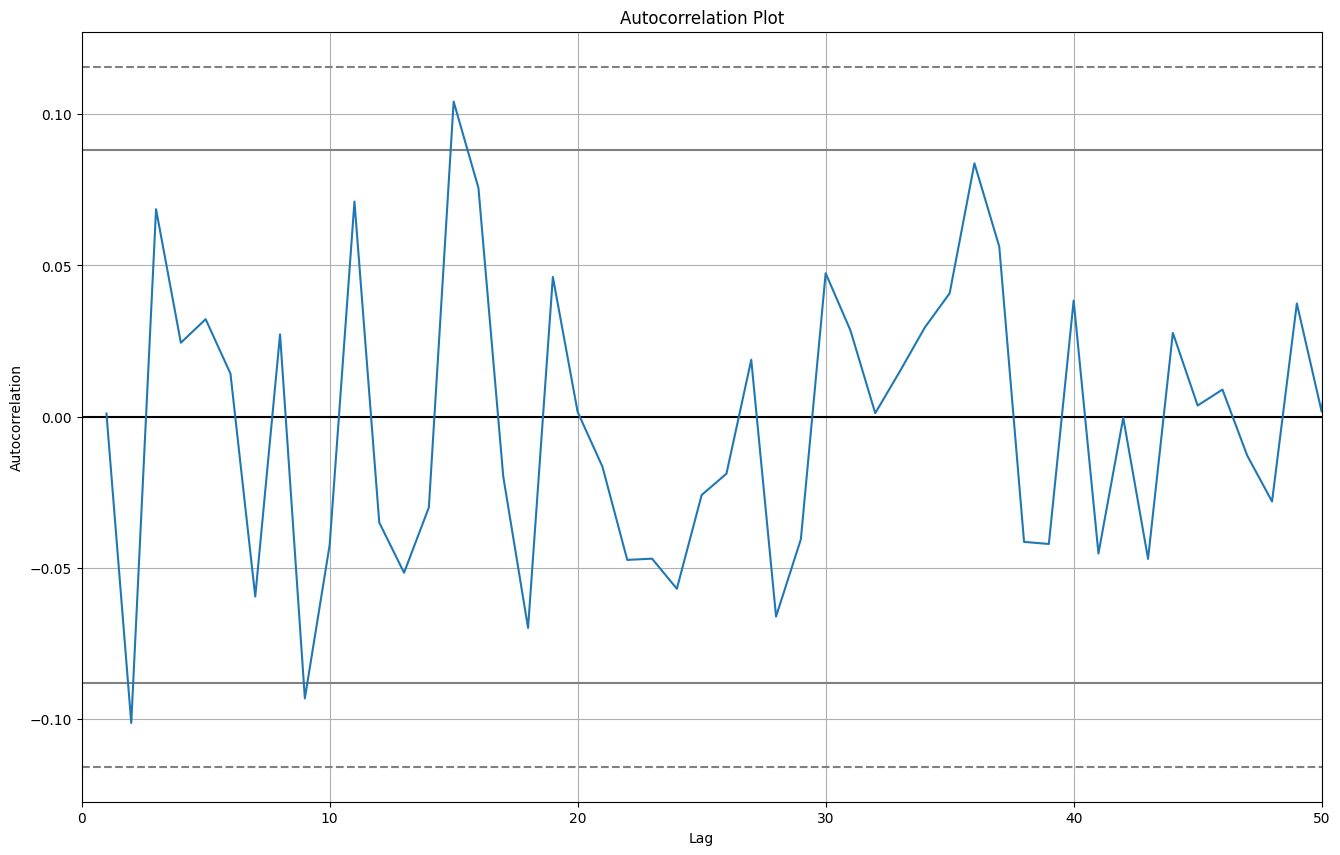

In [24]:
fig, ax = plt.subplots(figsize=(16, 10))
pd.plotting.autocorrelation_plot(diff_train, ax=ax)
ax.set(title='Autocorrelation Plot', xlabel='Lag', ylabel='Autocorrelation', xlim=(0, 50))
plt.show()

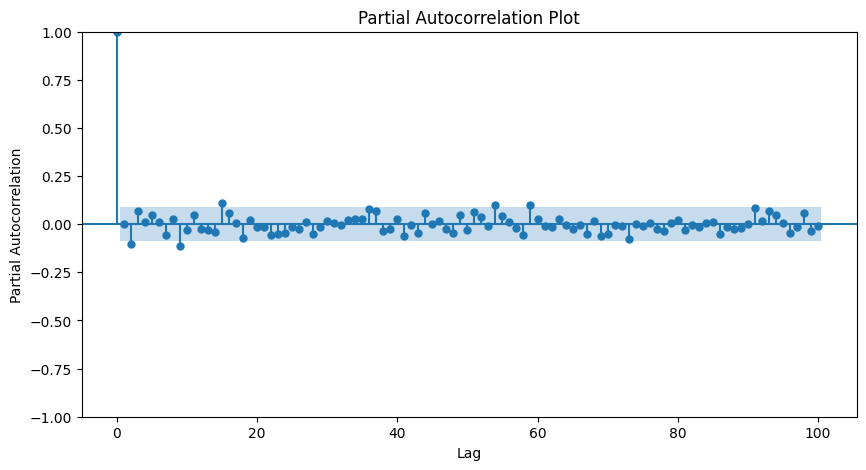

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(diff_train, ax=ax, lags=100)
ax.set(title='Partial Autocorrelation Plot', xlabel='Lag', ylabel='Partial Autocorrelation')
plt.show()

# 2.4 Grid Search

In [27]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.3 MB/s eta 0:00:00


In [28]:
import pmdarima as pm

# Cocokkan model ARIMA dengan hyperparameter tertentu
model = pm.auto_arima(train_data, start_p=0, start_q=0, start_order=0, max_p=10 ,max_q=10, max_order=10, test='adf', stepwise=False, trace=True, seasonal=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4068.747, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4070.747, Time=1.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4067.737, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4067.218, Time=1.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4068.410, Time=1.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4070.107, Time=2.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=4071.488, Time=0.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=4070.820, Time=0.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=4072.308, Time=2.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=4071.500, Time=2.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=4072.349, Time=1.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4070.747, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4070.269, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4068.340, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4068.263, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4069.841, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=4072.025, Time=1.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,6)(0,0,0)[0] intercept   : AIC=4071.436, Time=1.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,7)(0,0,0)[0] intercept   : AIC=4071.926, Time=1.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,8)(0,0,0)[0] intercept   : AIC=4073.863, Time=1.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,9)(0,0,0)[0] intercept   : AIC=4072.829, Time=2.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4067.660, Time=0.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4067.846, Time=1.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4067.733, Time=2.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4069.991, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4071.697, Time=1.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=4068.648, Time=2.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,6)(0,0,0)[0] intercept   : AIC=4070.343, Time=2.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,7)(0,0,0)[0] intercept   : AIC=4072.235, Time=2.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,8)(0,0,0)[0] intercept   : AIC=4074.235, Time=6.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4067.271, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4068.868, Time=0.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4070.851, Time=0.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4070.857, Time=1.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=4069.704, Time=1.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=4073.982, Time=2.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,6)(0,0,0)[0] intercept   : AIC=4072.409, Time=4.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,7)(0,0,0)[0] intercept   : AIC=4073.066, Time=3.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=4069.173, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=4070.865, Time=0.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=4072.774, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=4069.239, Time=1.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=4073.634, Time=4.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=3.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=4070.035, Time=0.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=4072.009, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=4073.294, Time=2.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=4074.118, Time=5.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=4071.945, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=4072.377, Time=1.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=4071.185, Time=1.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=6.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=4072.344, Time=0.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=4072.993, Time=0.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(7,1,2)(0,0,0)[0] intercept   : AIC=4074.187, Time=1.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(7,1,3)(0,0,0)[0] intercept   : AIC=4074.072, Time=2.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=4074.044, Time=0.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=4074.793, Time=1.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(8,1,2)(0,0,0)[0] intercept   : AIC=4076.027, Time=5.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=4069.817, Time=1.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=4071.551, Time=1.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=4071.317, Time=1.52 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 118.391 seconds


In [29]:
model

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  497
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -2028.609
Date:                Thu, 16 Jan 2025   AIC                           4067.218
Time:                        08:06:54   BIC                           4088.251
Sample:                             0   HQIC                          4075.474
                                - 497                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1739      0.651      0.267      0.789      -1.102       1.450
ma.L1          0.0040      0.040      0.099      0.921      -0.074       0.082
ma.L2         -0.0988      0.042     -2.327      0.020      -0.182      -0.016
ma.L3          0.0697      0.044      1.577      0.115      -0.017       0.156
sigma2       208.9154     10.082     20.722      0.000     189.155     228.675
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                58.01
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.29
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 2.5 Forcasting

In [31]:
forecast=model.predict(n_periods=1, return_conf_int=True)
print()

print(f"Forcast(predicted) price: {forecast[0].values[0]:.2f}")
print( "Actual price:            ",test_data[0])


Forcast(predicted) price: 1872.65
Actual price:             1874.97


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-31-02ef26082f7b>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. 

In [32]:
forecast=model.predict(n_periods=len(test_data), return_conf_int=True)
serie=forecast[0]
forecast_df = pd.DataFrame(serie,columns=['Forcast'])
forecast_df = forecast_df.reset_index(drop=True).set_index(pd.Index(range(len(forecast_df))))
forecast_df['Index']=test_data.index
forecast_df = forecast_df.set_index('Index')
forecast_df['Actual']=test_data
forecast_df

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Forcast,Actual
Index,,
2023-02-08,1872.652243,1874.97
2023-02-09,1872.199149,1862.23
2023-02-10,1872.864451,1865.28
2023-02-13,1873.038384,1854.34
2023-02-14,1873.212316,1854.94
...,...,...
2023-06-29,1893.388500,1908.76
2023-06-30,1893.562432,1919.20
2023-07-02,1893.736365,1917.70


<Axes: >

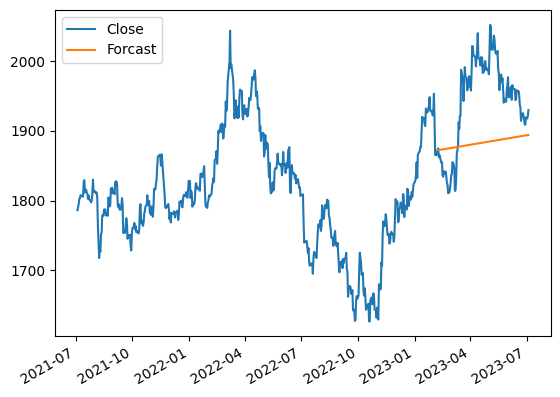

In [33]:
pd.concat([df['Close'],forecast_df['Forcast']],axis=1).plot()

# 2.6 Prediction

In [38]:
import pandas as pd
import statsmodels.api as sm

# Salin data test_data untuk pengolahan
test_data_copy = test_data.copy()
Control = len(test_data)  # Parameter untuk menghentikan loop
ActualList = []  # Untuk menyimpan nilai aktual
PredictList = []  # Untuk menyimpan nilai prediksi

# Model awal ARIMA
model = sm.tsa.ARIMA(train_data, order=(0, 1, 3))
results = model.fit()
forecast = results.forecast(steps=1)

# Tambahkan nilai awal ke daftar prediksi dan aktual
PredictList.append(forecast.iloc[0])  # Prediksi pertama
ActualList.append(test_data.iloc[0])  # Nilai aktual pertama

# Loop untuk prediksi
for i in range(len(test_data)):
    # Dapatkan nilai tanggal dan data
    date = test_data.index[i]
    value = test_data.iloc[i]

    # Tambahkan nilai ke train_data
    train_data.loc[date] = value

    # Perbarui model ARIMA
    model = sm.tsa.ARIMA(train_data, order=(0, 1, 3))
    results = model.fit()

    # Forecast langkah ke depan
    forecast = results.forecast(steps=1)
    PredictList.append(forecast.iloc[0])  # Tambahkan prediksi ke daftar
    ActualList.append(value)  # Tambahkan nilai aktual

    # Hentikan loop jika daftar prediksi sudah sesuai panjang
    if len(PredictList) == Control:
        break

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [39]:
df_predict = pd.DataFrame({'Actual': ActualList, 'Predict': PredictList})
df_predict = df_predict.set_index(test_data_copy.index)
df_predict

,Actual,Predict
Date,,
2023-02-08,1874.97,1872.473767
2023-02-09,1874.97,1874.349918
2023-02-10,1862.23,1862.436430
2023-02-13,1865.28,1866.671514
2023-02-14,1854.34,1853.176032
...,...,...
2023-06-29,1909.58,1910.106526
2023-06-30,1908.76,1909.250137
2023-07-02,1919.20,1919.311677


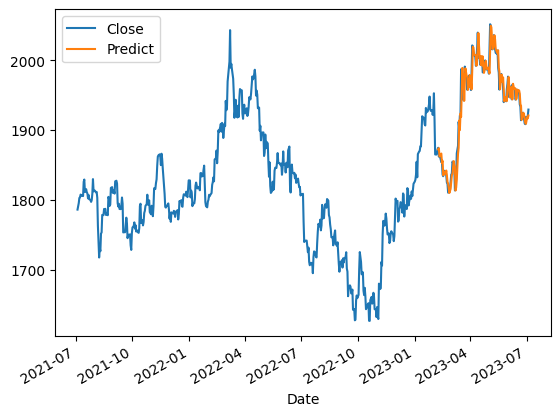

In [40]:
combined_df = pd.concat([df['Close'],df_predict['Predict']],axis=1).plot()

# 2.7 Evaluasi

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung Kesalahan Kuadrat Rata-rata (Mean Squared Error)
mse = mean_squared_error(df_predict['Actual'], df_predict['Predict'])

# Menghitung Skor R-Kuadrat (R-squared Score)
r2 = r2_score(df_predict['Actual'], df_predict['Predict'])

# Menampilkan hasil perhitungan dalam bahasa Indonesia
print('Kesalahan Kuadrat Rata-rata (Mean Squared Error):', mse)
print('Skor R-Kuadrat (R-squared Score):', r2)

Kesalahan Kuadrat Rata-rata (Mean Squared Error): 1.6490170780657232
Skor R-Kuadrat (R-squared Score): 0.9995914984106645


In [44]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(df_predict['Actual'], df_predict['Predict'])

# Menghitung Root Mean Squared Error (RMSE) secara manual
rmse = np.sqrt(mean_squared_error(df_predict['Actual'], df_predict['Predict']))

# Menghitung Explained Variance Score (EVS)
evs = explained_variance_score(df_predict['Actual'], df_predict['Predict'])

# Mendefinisikan fungsi khusus untuk menghitung Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    return 100 * abs(y_true - y_pred) / y_true.mean()

# Menghitung Mean Absolute Percentage Error (MAPE)
mape_val = mape(df_predict['Actual'], df_predict['Predict']).mean()

# Mendefinisikan fungsi khusus untuk menghitung Symmetric Mean Absolute Percentage Error (SMAPE)
def smape(y_true, y_pred):
    return 200 * abs(y_true - y_pred) / (y_true + y_pred)

# Menghitung Symmetric Mean Absolute Percentage Error (SMAPE)
smape_val = smape(df_predict['Actual'], df_predict['Predict']).mean()

# Menampilkan hasil perhitungan dalam bahasa Indonesia
print('Kesalahan Absolut Rata-rata (Mean Absolute Error):', mae)
print('Akar Kuadrat Kesalahan Kuadrat Rata-rata (Root Mean Squared Error):', rmse)
print('Skor Variansi yang Dijelaskan (Explained Variance Score):', evs)
print('Kesalahan Persentase Absolut Rata-rata (Mean Absolute Percentage Error):', mape_val, " %")
print('Kesalahan Persentase Absolut Rata-rata Simetris (Symmetric Mean Absolute Percentage Error):', smape_val, " %")

Kesalahan Absolut Rata-rata (Mean Absolute Error): 0.9636937429738864
Akar Kuadrat Kesalahan Kuadrat Rata-rata (Root Mean Squared Error): 1.2841405990255597
Skor Variansi yang Dijelaskan (Explained Variance Score): 0.9995915847233753
Kesalahan Persentase Absolut Rata-rata (Mean Absolute Percentage Error): 0.0495830521863179  %
Kesalahan Persentase Absolut Rata-rata Simetris (Symmetric Mean Absolute Percentage Error): 0.049712555474347185  %
